In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import requests
import time 

In [2]:
# import csv file into dataframe 
book_file = "google_books_1299.csv"
book_df = pd.read_csv(book_file)
book_df

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014"
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007"
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019"
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009"
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1294,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,41.82,SAR,A short gift book of festive hospital diaries ...,Pan Macmillan,112,"Medical , Health Care Delivery",9781529018592,English,"Oct 17, 2019"
1295,1295,Why We Sleep: The New Science of Sleep and Dreams,Matthew Walker,4.8,52,46.85,SAR,'Astonishing ... an amazing book ... absolutel...,Penguin UK,368,"Psychology , Cognitive Psychology &amp, Cognition",9780141983776,English,"Sep 28, 2017"
1296,1296,How to Understand Business Finance: Edition 2,Bob Cinnamon,3.5,4,46.85,SAR,The modern marketplace is increasingly unpredi...,Kogan Page Publishers,176,none,9780749460211,English,"Apr 3, 2010"
1297,1297,Spider-Man: Kraven's Last Hunt,J. M. DeMatteis,4.6,74,43.28,SAR,"Collects Web of Spider-Man #31-32, Amazing Spi...",Marvel Entertainment,168,none,9781302377366,English,"Dec 10, 2014"


In [3]:
# clean up dataframe 
# remove row with page count error 
book_df = book_df[book_df.title != "Deadpool Team-Up Vol. 1: Good Buddies"]
#drop empty lines 
book_df = book_df.dropna()
# drop duplicates 
book_df = book_df.drop_duplicates(subset="title", keep="first", inplace = False)

In [4]:
## Helena Data Analysis 

# rename price to show price in SAR
sar_price_df = book_df.rename(columns={"price":"Price (SAR)"})
# reset index 
sar_price_df.reset_index()
sar_price_df

,Unnamed: 0,title,author,rating,voters,Price (SAR),currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014"
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007"
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019"
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009"
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,678,One Small Step Can Change Your Life: The Kaize...,Robert Maurer,4.4,186,39.19,SAR,Improve your life fearlessly with this essenti...,Workman Publishing,228,"Self-Help , Personal Growth , Success",9780761181347,English,"Apr 22, 2014"
737,737,Injustice: Gods Among Us Year One - The Comple...,Tom Taylor,4.7,391,98.42,SAR,"Inspired by the video game phenomenon, INJUSTI...",DC,400,none,9781401267452,English,"Mar 8, 2016"
745,745,Leadership 101: What Every Leader Needs to Know,John C. Maxwell,4.4,5,32.48,SAR,Unleash your leadership potential. No matter w...,HarperCollins Leadership,128,none,9781418535285,English,"Sep 8, 2002"
746,746,The Complete Art of War,Sun Tzu,4.7,110,7.84,SAR,Collected here in this 4-in-1 omnibus are the ...,Simon and Schuster,667,"Political Science , Political Ideologies , Gen...",9781627931502,English,"Apr 29, 2013"


In [5]:
# seperate only publisher name and price 
publisher_df = sar_price_df[["publisher","Price (SAR)"]]
# convert to dollar 
dollar = publisher_df["Price (SAR)"] * 0.27 
publisher_df.insert(2, "Price ($)", dollar, True) 
publisher_df.style.format({"Price ($)":"${:,.2f}"})

,publisher,Price (SAR),Price ($)
0,Kodansha Comics,43.280000,$11.69
1,Kensington Publishing Corp.,26.150000,$7.06
2,Dark Horse Comics,133.850000,$36.14
3,Kensington Publishing Corp.,26.150000,$7.06
4,HarperCollins UK,28.540000,$7.71
5,HarperCollins UK,29.290000,$7.91
6,Titan Books,15.820000,$4.27
7,Tor Books,36.790000,$9.93
8,HarperCollins,50.250000,$13.57
9,Pan Macmillan,41.820000,$11.29


In [6]:
# group by publisher 
group_pub_df = publisher_df.groupby(['publisher'])
avg_price = group_pub_df.mean()["Price ($)"]
publish_count = group_pub_df["publisher"].count()
# create a new dataframe 
new_publish_df = pd.DataFrame({"Average Book Price":avg_price,"Number of Books": publish_count})
#format and clean up dataframe 
no_index_df = new_publish_df.reset_index()
no_index_df.style.format({"Average Book Price" : "${:,.2f}"})

,publisher,Average Book Price,Number of Books
0,Abrams,$14.34,1
1,Andrews McMeel Publishing,$8.95,1
2,Archie Comic Publications,$3.18,1
3,Ballantine Books,$8.49,2
4,Bantam,$11.81,3
5,Berrett-Koehler Publishers,$20.15,2
6,Blake Pierce,$4.79,6
7,Bloomsbury Publishing,$18.69,1
8,Bonnier Zaffre Ltd.,$9.95,1
9,BookRix,$0.50,2


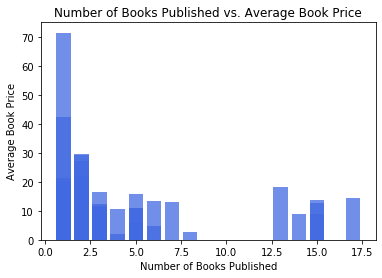

In [7]:
# create variables that can be used to chart 
book_num = no_index_df["Number of Books"]
book_prices = no_index_df["Average Book Price"]
# create chart to represent data 
plt.bar(book_num, book_prices, color="royalblue", alpha=0.75, align="center")
plt.title("Number of Books Published vs. Average Book Price")
plt.xlabel("Number of Books Published")
plt.ylabel("Average Book Price")
# save plot as a png file 
plt.savefig("./Figures/Number_of_Books_Published_vs_Average_Book_Price_bar.png")
plt.show()

In [8]:
# create a top ten publisher list for book price 
sort_df = no_index_df.sort_values(
    ["Number of Books", "Average Book Price"], ascending=False)
top_pub_df = sort_df.loc[sort_df["Number of Books"] >5, :]
# reset index to number to 10 
top_ten_df = top_pub_df.reset_index()
# remove column named index 
del top_ten_df["index"]
top_ten_df.style.format({"Average Book Price" : "${:,.2f}"})

,publisher,Average Book Price,Number of Books
0,Hachette UK,$14.50,17
1,Marvel Entertainment,$13.81,15
2,Penguin,$12.67,15
3,Simon and Schuster,$8.88,15
4,HarperCollins UK,$8.91,14
5,DC,$18.15,13
6,IDW Publishing,$2.78,8
7,Harper Collins,$13.05,7
8,Del Rey,$13.38,6
9,Blake Pierce,$4.79,6


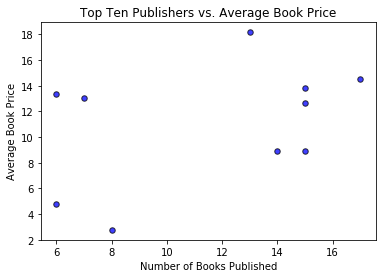

In [9]:
# create variables for chart 
top_num = top_ten_df["Number of Books"]
top_price = top_ten_df["Average Book Price"]
# create chart to represent data 
plt.scatter(top_num, top_price, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
plt.title("Top Ten Publishers vs. Average Book Price")
plt.xlabel("Number of Books Published")
plt.ylabel("Average Book Price")
# save as png file 
plt.savefig("./Figures/Top_Ten_Publishers_vs_Average_Book_Price.png")
plt.show()

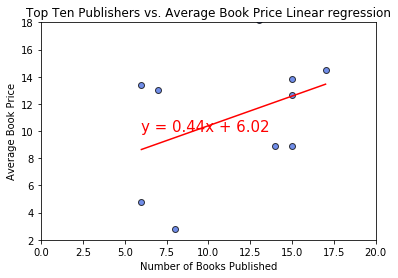

In [10]:
# perform linear regression on scatter plot 
# create linear equation 
(slope, intercept, rvalue, pvalue, stderr) = linregress(top_num, top_price)
regress_values = top_num * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# create scatter plot 
plt.scatter(top_num,top_price,facecolors="royalblue", edgecolors="black",alpha=0.75)
plt.plot(top_num,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(0,20)
plt.ylim(2,18)
plt.xlabel("Number of Books Published")
plt.ylabel("Average Book Price")
plt.title("Top Ten Publishers vs. Average Book Price Linear regression")
# save as png file 
plt.savefig("./Figures/Top_ten_publishers_vs_Average_Book_Price_linear.png")
plt.show()

In [11]:
pages_df = sar_price_df[["page_count","Price (SAR)"]]
# convert to dollar 
con_dollar = pages_df["Price (SAR)"] * 0.27 
pages_df.insert(2, "Price ($)", con_dollar, True) 
# rename column 
page_count_df= pages_df.rename(columns={"page_count":"Page Count"})
page_count_df.style.format({"Price ($)":"${:,.2f}"})
# sort by page count 
sorted_pages_df= page_count_df.sort_values(
    ["Page Count"], ascending=False)
sorted_pages_df
# format dollar signs 
sorted_pages_df.style.format({"Price ($)":"${:,.2f}"})

,Page Count,Price (SAR),Price ($)
68,4544,88.060000,$23.78
599,1728,129.510000,$34.97
285,1712,66.120000,$17.85
38,1424,4.170000,$1.13
191,1400,0.000000,$0.00
307,1216,81.870000,$22.10
190,1168,19.650000,$5.31
239,1040,39.340000,$10.62
168,944,55.100000,$14.88
5,864,29.290000,$7.91


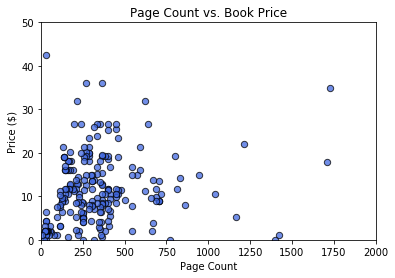

In [12]:
# create x and y axis for plot 
count_pages= sorted_pages_df["Page Count"] 
dollar_price = sorted_pages_df["Price ($)"]

# create a scatter plot to analyze data 
plt.scatter(count_pages, dollar_price, marker="o", facecolors="royalblue", edgecolors="black",
            s=40, alpha=0.75)
plt.xlim(0,2000)
plt.ylim(0,50)
plt.xlabel("Page Count")
plt.ylabel("Price ($)")
plt.title("Page Count vs. Book Price")
# save as png file 
plt.savefig("./Figures/Page_Count_vs._Book_Price.png")
# show plot 
plt.show()

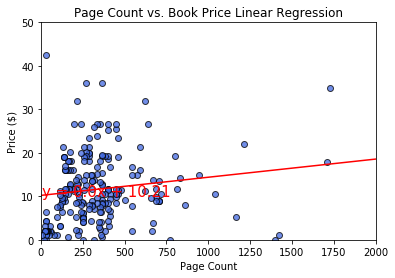

In [13]:
# perform linear regression on scatter plot 
# create linear equation 
(slope, intercept, rvalue, pvalue, stderr) = linregress(count_pages, dollar_price)
regress_values = count_pages * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# create scatter plot 
plt.scatter(count_pages,dollar_price,facecolors="royalblue", edgecolors="black",alpha=0.75)
plt.plot(count_pages,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(0,2000)
plt.ylim(0,50)
plt.xlabel("Page Count")
plt.ylabel("Price ($)")
plt.title("Page Count vs. Book Price Linear Regression")
# save as png file 
plt.savefig("./Figures/Page_Count_vs._Book_Price_Linear_Regression.png")
plt.show()

In [14]:
## Jackson Data Analysis 

In [15]:
book_df['published_date'] = book_df['published_date'].astype('datetime64[ns]')
book_df["month"] = book_df.published_date.dt.month
book_df

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,month
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,2014-07-31,7
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,2007-07-01,7
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,2019-11-05,11
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,2009-03-01,3
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,2009-01-08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,678,One Small Step Can Change Your Life: The Kaize...,Robert Maurer,4.4,186,39.19,SAR,Improve your life fearlessly with this essenti...,Workman Publishing,228,"Self-Help , Personal Growth , Success",9780761181347,English,2014-04-22,4
737,737,Injustice: Gods Among Us Year One - The Comple...,Tom Taylor,4.7,391,98.42,SAR,"Inspired by the video game phenomenon, INJUSTI...",DC,400,none,9781401267452,English,2016-03-08,3
745,745,Leadership 101: What Every Leader Needs to Know,John C. Maxwell,4.4,5,32.48,SAR,Unleash your leadership potential. No matter w...,HarperCollins Leadership,128,none,9781418535285,English,2002-09-08,9
746,746,The Complete Art of War,Sun Tzu,4.7,110,7.84,SAR,Collected here in this 4-in-1 omnibus are the ...,Simon and Schuster,667,"Political Science , Political Ideologies , Gen...",9781627931502,English,2013-04-29,4


In [16]:
book_df['month'].replace(12,0, inplace = True)
book_df = pd.DataFrame(book_df)
book_df

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,month
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,2014-07-31,7
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,2007-07-01,7
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,2019-11-05,11
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,2009-03-01,3
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,2009-01-08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,678,One Small Step Can Change Your Life: The Kaize...,Robert Maurer,4.4,186,39.19,SAR,Improve your life fearlessly with this essenti...,Workman Publishing,228,"Self-Help , Personal Growth , Success",9780761181347,English,2014-04-22,4
737,737,Injustice: Gods Among Us Year One - The Comple...,Tom Taylor,4.7,391,98.42,SAR,"Inspired by the video game phenomenon, INJUSTI...",DC,400,none,9781401267452,English,2016-03-08,3
745,745,Leadership 101: What Every Leader Needs to Know,John C. Maxwell,4.4,5,32.48,SAR,Unleash your leadership potential. No matter w...,HarperCollins Leadership,128,none,9781418535285,English,2002-09-08,9
746,746,The Complete Art of War,Sun Tzu,4.7,110,7.84,SAR,Collected here in this 4-in-1 omnibus are the ...,Simon and Schuster,667,"Political Science , Political Ideologies , Gen...",9781627931502,English,2013-04-29,4


In [17]:
labels = ['Winter', 'Spring', "Summer", 'Fall']
bins = [-.01,2.99,5.99,8.99,11]
book_df['season'] = pd.cut(book_df['month'], bins=bins, labels=labels)
book_df.head()

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,month,season
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,2014-07-31,7,Summer
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,2007-07-01,7,Summer
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,2019-11-05,11,Fall
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,2009-03-01,3,Spring
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,2009-01-08,1,Winter


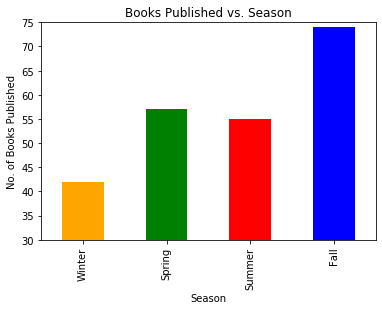

In [18]:
season_count = book_df['season'].value_counts().sort_index().plot(kind='bar',color = ['orange', 'green' , 'red', 'blue'], ylim = (30,75))
season_count.set_ylabel("No. of Books Published")
season_count.set_xlabel("Season")
season_count.set_title("Books Published vs. Season")
plt.savefig("./Figures/Books_Published_vs_Season.png")

In [19]:
observed = pd.Series(book_df['season'].value_counts(), index=["Fall", "Spring", "Summer", "Winter"])

In [20]:
df = pd.DataFrame([observed]).T

In [21]:
df[1] = 57

In [22]:
df.columns = ["observed", "expected"]
df

,observed,expected
Fall,74,57
Spring,57,57
Summer,55,57
Winter,42,57


In [23]:
critical_value = stats.chi2.ppf(q = 0.95, df = 3)
critical_value

7.814727903251179

In [24]:
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=9.087719298245615, pvalue=0.028147061396551903)

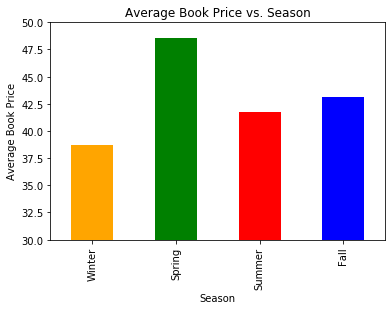

In [25]:
season_price = book_df.groupby('season')['price'].mean().sort_index().plot(kind='bar', ylim = (30,50), color = ['orange', 'green' , 'red', 'blue'])
season_price.set_ylabel("Average Book Price")
season_price.set_xlabel("Season")
season_price.set_title("Average Book Price vs. Season")
plt.savefig('./Figures/Average_Price_vs_Season.png')

In [26]:
## Catherine Data Analysis any

In [27]:
#Standard Deviation for all data
book_df[["rating"]].std()

rating    0.365084
dtype: float64

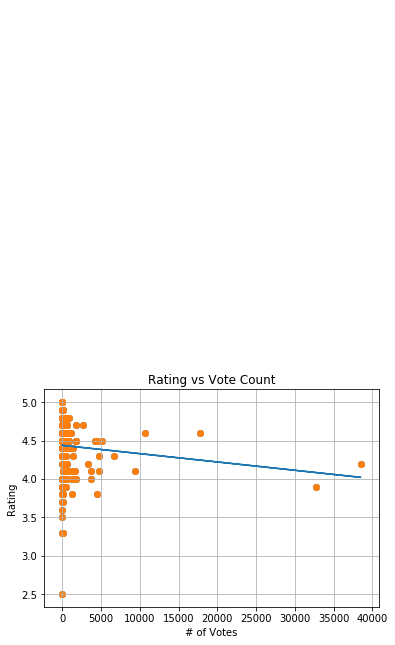

In [28]:
# Build a scatter plot votes vs rating
x_values = book_df["voters"].str.replace(",","").astype(float)
y_values = book_df["rating"]
plt.scatter(x_values, y_values, marker="o") 
# Incorporate the other graph properties
plt.title("Rating vs Vote Count")
plt.ylabel("Rating")
plt.xlabel("# of Votes")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("./Figures/RatingVsVoteCount.png")

# Show plot
plt.show()

In [29]:
#Remove outliers for vote count
remove_vote_outliers = book_df.loc[book_df["voters"].str.replace(",","").astype(float)<5000]
remove_vote_outliers_df=pd.DataFrame(remove_vote_outliers)

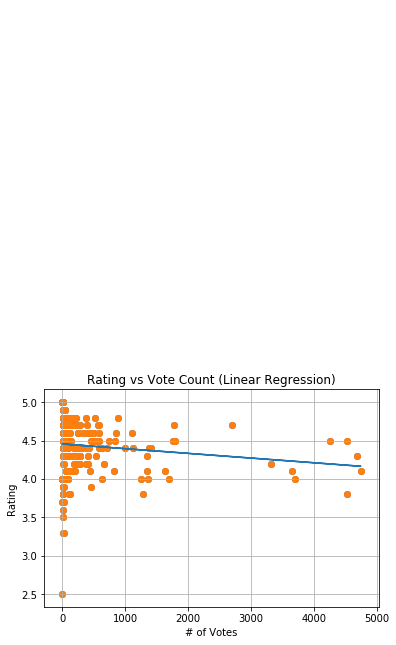

In [30]:
# Scatter Plot Votes Vs Rating Without Outliers
# Build a scatter plot votes vs rating
x_values = remove_vote_outliers_df["voters"].str.replace(",","").astype(float)
y_values = remove_vote_outliers_df["rating"]
plt.scatter(x_values, y_values, marker="o") 
# Incorporate the other graph properties
plt.title("Rating vs Vote Count (Linear Regression)")
plt.ylabel("Rating")
plt.xlabel("# of Votes")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(6,10),fontsize=15)

# Save the figure
plt.savefig("./Figures/RatingVsVoteCountLinear.png")

# Show plot
plt.show()

In [31]:
# Create the bins in which Data will be held  
bins = [0, 50, 500, 5000, 50000]

# Create the names for the five bins
bin_names = ["0-49", "50-500", "500-5,000", "5,000-50,000"]

In [32]:
# Slice the data and place it into bins
pd.cut(book_df["voters"].str.replace(",","").astype(float), bins, labels=bin_names).head()

0       50-500
1         0-49
2         0-49
3         0-49
4    500-5,000
Name: voters, dtype: category
Categories (4, object): [0-49 < 50-500 < 500-5,000 < 5,000-50,000]

In [33]:
book_df["Rating Count Bin"] = pd.cut(book_df["voters"].str.replace(",","").astype(float), bins, labels=bin_names, include_lowest=True)
book_df
# Creating a group based off of the bins
binned_df = book_df.groupby("voters")
binned_df.max()

,Unnamed: 0,title,author,rating,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,month,season,Rating Count Bin
voters,,,,,,,,,,,,,,,,
1,404,Working With You is Killing Me: Freeing Yourse...,Thomas Ittelson,5.0,98.42,SAR,“One of the greatest writers of the twentieth ...,Simon and Schuster,448,none,"Flowing text, Google-generated PDF",English,2019-11-14,11,Fall,0-49
"1,105",307,The Lord of the Rings: The Fellowship of the R...,J. R. R. Tolkien,4.6,81.87,SAR,All three parts of the epic masterpiece The Lo...,HarperCollins UK,1216,"Fiction , Fairy Tales, Folk Tales, Legends &am...",9780007322596,English,2009-04-20,4,Spring,"500-5,000"
"1,130",55,I Am Pilgrim: The bestselling Richard & Judy B...,Terry Hayes,4.4,49.92,SAR,'An all too plausible disaster for the world w...,Random House,704,"Fiction , Thrillers , Suspense",9781448170609,English,2013-07-18,7,Summer,"500-5,000"
"1,251",54,Little Girl Lost: A Lucy Black Thriller,Brian McGilloway,4.0,35.44,SAR,This New York Times bestseller is perfect for ...,Harper Collins,336,"Fiction , Mystery &amp, Detective , Women Sleuths",9780062336583,English,2014-02-18,2,Winter,"500-5,000"
"1,285",498,Mega Man #1,Ian Flynn,3.8,11.78,SAR,The future looks bright when brilliant and ben...,Archie Comic Publications,25,"Juvenile Fiction , Humorous Stories",9781619882171,English,2011-05-04,5,Spring,"500-5,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,607,The Jump,Doug Johnstone,4.1,32.78,SAR,Struggling to come to terms with the suicide o...,Faber & Faber,304,none,9780571321599,English,2015-08-04,8,Summer,50-500
94,6,God of War: The Official Novelization,J.M. Barlog,4.5,15.82,SAR,The novelization of the highly anticipated God...,Titan Books,400,"Fiction , Media Tie-In",9781789090154,English,2018-08-28,8,Summer,50-500
95,121,Kings and Sorcerers Bundle (Books 2 and 3),Morgan Rice,4.5,33.72,SAR,“An action packed fantasy sure to please fans ...,Morgan Rice,500,none,9781632915740,English,2016-02-25,2,Winter,50-500


In [34]:
# Create a GroupBy object based upon "View Group"
book_group = book_df.groupby("Rating Count Bin")

# Find how many rows fall into each bin
print(book_group["Rating Count Bin"].count())

# Get the average of each column within the GroupBy object
rating_mean=book_group[["rating"]].mean()
rating_mean

Rating Count Bin
0-49            92
50-500          87
500-5,000       42
5,000-50,000     7
Name: Rating Count Bin, dtype: int64


,rating
Rating Count Bin,
0-49,4.457609
50-500,4.439080
"500-5,000",4.357143
"5,000-50,000",4.314286


In [35]:
#Standard Deviation per bin
book_group[["rating"]].std()

,rating
Rating Count Bin,
0-49,0.480438
50-500,0.253054
"500-5,000",0.267000
"5,000-50,000",0.267261


In [36]:
## Molly Data Analysis

In [37]:
#find max pages for limit on x-axis
max_x = book_df['page_count'].max()
max_x

4544

In [39]:
#find max voters for limit on y-axis
max_y = book_df['voters'].max()
max_y

'997'

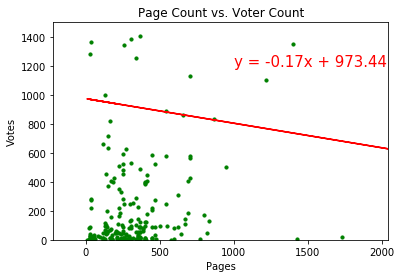

In [44]:
#graph data
x_axis = book_df['page_count']
y_axis = book_df['voters'].str.replace(",","").astype(float)
plt.scatter(x_axis, y_axis, color='green', s=10)
plt.xlim(right=max_x - 2500)
plt.ylim(top=1500,bottom=0)
plt.title("Page Count vs. Voter Count")
plt.ylabel("Votes")
plt.xlabel("Pages")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (1000,1200), fontsize=15, color="red")

# Save the figure
plt.savefig("./Figures/PageCountvsVoterCount.png")

In [41]:
#Bin by Page Count
bins = [0,249,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500,3750,4000,4250,4500,4750,5000]
group_names = ['0-250', '251-500', '501-750', '751-1000', '1001-1250', '1251-1500', '1501-1750', '1751-2000', '2001-2250', '2251-2500','2501-2750', '2751-3000', '3001-3250', '3251-3500', '3501-3750', '3751-4000', '4001-4250', '4251-4500','4501-4750', '4751-5000']
book_df['Page Count Bin'] = pd.cut(book_df['page_count'], bins, labels=group_names)
book_df


,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,month,season,Rating Count Bin,Page Count Bin
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,2014-07-31,7,Summer,50-500,0-250
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,2007-07-01,7,Summer,0-49,251-500
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,2019-11-05,11,Fall,0-49,251-500
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,2009-03-01,3,Spring,0-49,251-500
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,2009-01-08,1,Winter,"500-5,000",501-750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,678,One Small Step Can Change Your Life: The Kaize...,Robert Maurer,4.4,186,39.19,SAR,Improve your life fearlessly with this essenti...,Workman Publishing,228,"Self-Help , Personal Growth , Success",9780761181347,English,2014-04-22,4,Spring,50-500,0-250
737,737,Injustice: Gods Among Us Year One - The Comple...,Tom Taylor,4.7,391,98.42,SAR,"Inspired by the video game phenomenon, INJUSTI...",DC,400,none,9781401267452,English,2016-03-08,3,Spring,50-500,251-500
745,745,Leadership 101: What Every Leader Needs to Know,John C. Maxwell,4.4,5,32.48,SAR,Unleash your leadership potential. No matter w...,HarperCollins Leadership,128,none,9781418535285,English,2002-09-08,9,Fall,0-49,0-250
746,746,The Complete Art of War,Sun Tzu,4.7,110,7.84,SAR,Collected here in this 4-in-1 omnibus are the ...,Simon and Schuster,667,"Political Science , Political Ideologies , Gen...",9781627931502,English,2013-04-29,4,Spring,50-500,501-750


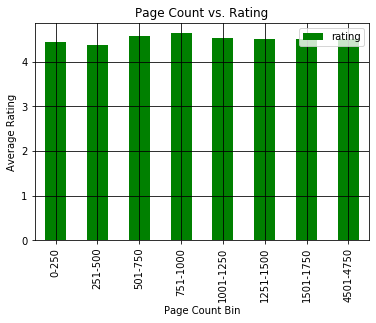

In [43]:
#Groupby Page Count
groupby_df = pd.DataFrame(book_df.groupby('Page Count Bin').mean()['rating'])
bar = groupby_df.dropna().plot(kind='bar', title='Page Count vs. Rating', color='green');
bar.set_ylabel("Average Rating")
bar.grid('on', which='major', axis='x', color='black')
bar.grid('on', which='major', axis='y', color='black')

# Save the figure
plt.savefig("./Figures/PageCountvsRating.png")
